In [116]:
import cv2
import numpy as np
import random
from preprocessing import norm_char_size

def augment_affine(img):
    h, w = img.shape

    rands = [(random.random() * 3 - 1.5) / 10 for _ in range(3)]
    stretch_coefs = [1, random.random() * 0.2 + 0.8]
    random.shuffle(stretch_coefs)

    src_tri = [
        [0, 0], 
        [w, 0], 
        [0, h]
    ]

    dest_tri = [
        [0, h*rands[0]], 
        [w*stretch_coefs[0], h*rands[1]], 
        [w*rands[2], h*stretch_coefs[1]]
    ]

    src_tri = np.array(src_tri).astype(np.float32)
    dest_tri = np.array(dest_tri).astype(np.float32)
    warp_mat = cv2.getAffineTransform(src_tri, dest_tri)
    res = cv2.warpAffine(img, warp_mat, (h, w))

    return res


def augment_rotate(img):
    center = (img.shape[1]//2, img.shape[0]//2)
    angle = random.random() * 10 - 6
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1)
    res = cv2.warpAffine(img, rot_mat, (img.shape[1], img.shape[0]))
    return res


def augment_morph(img):
    max_coef = int(128 * 0.03)
    coef = random.randint(0, max_coef)
    if coef == 0:
        return img

    se = np.ones((coef, coef))
    if random.random() > 0.5:
        return cv2.erode(img, se)
    return cv2.dilate(img, se)


def augment_image(img):
    h, w = img.shape
    res = np.pad(img, (int(h*0.2), int(w * 0.2)), 'constant', constant_values=(0, 0))
    res = augment_affine(res)
    res = augment_rotate(res)
    res = augment_morph(res)
    res = (norm_char_size(res, 128, 10) > res.max() / 2).astype('int')
    return res

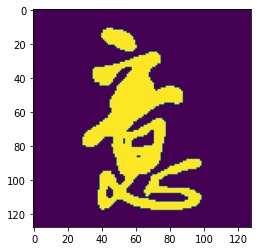

In [67]:
import matplotlib.pyplot as plt
img_ori = cv2.imread('../../data/shufadict/clean/意/082f7a88c6e33dddb09c55d12ecc08b0.png')[:, :, 0]
plt.imshow(img_ori)

In [110]:
cv2.imwrite('/Users/kx/desktop/affine.png', (img_affine > 0).astype('int'))

True

True

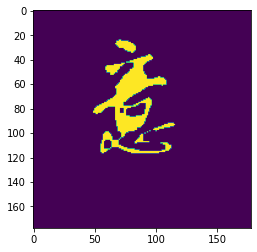

In [124]:
path = '/Users/kx/desktop/morph.png'
tmp = (img_morph > 255/2).astype('int') * 255
plt.imshow(tmp)
cv2.imwrite(path, tmp)

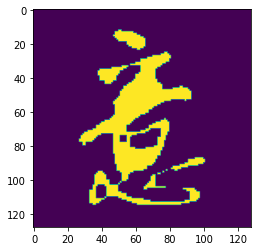

In [99]:
img = img_ori
h, w = img.shape
img = np.pad(img, (int(h*0.2), int(w * 0.2)), 'constant', constant_values=(0, 0))
img_affine = augment_affine(img)
img_affine = augment_rotate(img_affine)
img_morph = augment_morph(img_affine)
res = norm_char_size(img_morph, 128, 10)
res = (res > img_morph.max() / 2).astype('int')
plt.imshow(res)

In [36]:
ls ../../data/shufadict/clean/意

03024f220a1eb24a2d933c09bcb93fe1.png  6dfeb161d26b284f6aed6326dbcc46a5.png
03071c7c2e17c3964e9e94c33fed550c.png  6e19b317fd8a83be1f0ba8eea9b7dba4.png
033794390cbad7a4dedce104b8ba04bf.png  6f0f3ea7b5fb7657210b58e1d519b563.png
041441bbfa193d33b0f6e9e1a88c821e.png  72a66540c71756615cac85d61884116c.png
048a6ba0f857be4f5f9bd99c9c9777ea.png  72f07e022c27a05797fd1d1314ee138e.png
062e27ab000d9b5702aac832129f7784.png  74aee200b83ef07930b06286b454f14d.png
082f7a88c6e33dddb09c55d12ecc08b0.png  74b2983cca96fb082260e01e64ff3848.png
0981fabd321e737dbed6bcc140370c52.png  77067e9eb9b6ddca74a40e05e884603e.png
0a16f0e5c29fe0977a4ebb8b11f7fdb2.png  7b991661e7de79efc60c2a110e63c264.png
10710a5699e5a10b466c4995af308c90.png  7bbc8cc4b044219df3a838ac3f6675ca.png
11761c8809ba6fbac3fa29f7110fbab0.png  80e433b365ffb71809c117b5d8b1c6cc.png
15d5eba3b67587ae797d1483d96a0a7e.png  8294b40a59ee801706fdcd4b1eb298e2.png
1b0ea0b42889807ca9f54f439056cc01.png  893a8b8abe7e0e7f09856a470b2f5d5e.png
1b9920ea6137e22491854bd4e